# Section 42: Tuning Neural Networks

- Study Group: 06/01/20
- online-ds-pt-100719

## Learning Objectives

- Discuss the different options available for tuning neural networks
- Discuss some rules of thumb for tuning Neural Networks

- **ACTIVITY: Use a computer vision task to walk-through hyperparameter tuning (cats vs dogs)**
    - [Zip File on Google Drive](https://drive.google.com/open?id=1WQ0fdJrNs5qVinJ_6rmVIIinOJD3p-n4)

- **Learn how to use GridSearchCV with Keras neural neural networks.**

    - Learn how to examine the other parameter results from a GridSearchCV object.

    - Learn how to create your own custom scorer for sklearn (and why you'd want to)
    
    
    
- Learn how to set up email notifications via Python (for gridsearch results) 
    - Actually... we will cover this in Mod Project office hours


## Questions/Comments?

- Spend time on EarlyStopping, ModelCheckpoint -  I didn’t get from the documentation what was coded. File path = .h5← file type?and why is monitor=’val_loss’ in both?

Their Code: 
```python
# Define the callbacks
early_stopping = [EarlyStopping(monitor='val_loss', patience=10), 
                  ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]
What I was trying 
#[EarlyStopping(patience=2), ← I get why this is wrong now…
#                 ModelCheckpoint(filepath='model_2.{epoch:10d}-{val_loss:.2f}.h5')] 
```


- Can you do interpolation when saving the file?
    - File name for keras checkpoints

- I get the idea of exploding or vanishing gradient descent but not sure I understand how in a  linear activation function “if the w's are slightly smaller than 1 or slightly larger, the activations will explode when there are many layers in the network…”



- How do we evaluate if the RMSE demonstrates a valid model or not?

- To evaluate the best training and validation performance..do you look at one or the other or how they relate to each other?

- What exactly does it mean to wrap a function and what does KerasRegressor do?


## Helpful Resources

- [Medium: Simple Guide to Hyperparameter Tuning in Neural Networks](https://towardsdatascience.com/simple-guide-to-hyperparameter-tuning-in-neural-networks-3fe03dad8594)
- [Medium: A guide to an efficient way to build neural network architectures- Part I:](https://towardsdatascience.com/a-guide-to-an-efficient-way-to-build-neural-network-architectures-part-i-hyper-parameter-8129009f131b)
- [Medium: Optimizers for Neural Networks](https://medium.com/@sdoshi579/optimizers-for-training-neural-network-59450d71caf6)

# Overview  - Neural Network Tuning 

## Rules of Thumb for Training Neural Networks

- **Always use a train-test-validation split.**
    - **Train-test-val splits:**
        - Training set: for training the algorithm
        - Validation set: used during training
        - Testing set: after choosing the final model, use the test set for an unbiased estimate of performance.
    - **Set sizes:**
        - With big data, your val and test sets don't necessarily need to be 20-30% of all the data. 
        - You can choose test and hold-out sets that are of size 1-5%. 
            - eg. 96% train, 2% hold-out, 2% test set.
            
            
- Consider using a `np.random.seed` for reproducibility/comparing models


- **Use cross validation of some sort to compare Networks**


- Normalize/Standardize features
    
    
- **Add EarlyStopping and ModelCheckpoint [callbacks](https://keras.io/api/callbacks/)**

    

#### From Learn

- **Rules of thumb re: bias/variance trade-off:**

| High Bias? (training performance) | high variance? (validation performance)  |
|---------------|-------------|
| Use a bigger network|    More data     |
| Train longer | Regularization   |
| Look for other existing NN architextures |Look for other existing NN architextures |


## Rules of Thumb - Hyperparameters to Tune 


- This section is roughly laid out in order of importance/what-to-tune-first
    - [Blog Post](https://towardsdatascience.com/a-guide-to-an-efficient-way-to-build-neural-network-architectures-part-i-hyper-parameter-8129009f131b)

### Hyperparameters (For Dense layers)

1. Number of layers (depends on the size of training data)


2. Number of neurons(depends on the size of training data)


3. Activation functions
    - Popular choices:
        - relu / leaky-relu
        - sigmoid / tanh (for shallow networks)
        
        
4. Optimizer:
    - Popular choices:
        - SGD (works well for shallow but gets stuck in local minima/saddle-points - if so use RMSProp)
        - RMSProp
        - Adam (general favorite)
        
        
5. Learning Rate
    - Try in powers of 10 (0.001,0.01,.1,1.0)
    - Which optimizer changes which l.r. is best (but try the others too).
        - SGD: 0.1
        - Adam: 0.001/0.01
    - Can use the `decay` parameter to reduce learning (though it is better to use adaptive optimizer than to adjust this)/.
    
    
6. Initialization
    - Not as important as defaults (glorot-uniform) work well, but:
        - Use He-normal/uniform initialization when using ReLu
        - Use Glorot-normal/uniform when using Sigmoid
    - Avoid using all zeros or any constant for all neurons


7. Batch Size
    - Finding the "right" size is important
        - Too small = weights update too quickly and convergence is difficult
        - Too large = weights update too slowly (plus PC RAM issues)
    - Try batch sizes that are powers of 2 (for memory optimization)
    - Larger is better than smaller.
    
    
8. Number of Epochs:
    - Important parameter to tune
    - Use EarlyStopping callback to prevent overfitting
    

9. Adding Dropout
    - Usually use dropout rate of 0.2 to 0.5
    
    

10. Adding regularization (L1,L2)
    - Use when the model continues to over-fit even after adding Dropout

### Hyperparameter Details

#### Kernel Initialization
- Kernel Initializers
```python
# define the grid search parameters
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 
             'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']```


#### Loss Functions
- MSE (regression)
- categorical cross-entropy (classification with 2D labels )
    - sparse categoricaln cross entropy (classification with 1D labels)
- binary cross-entropy (classification)
    - 2 categories
- can also uses custom scoring functions

#### L1/L2 Regularization

- **CHOOSING L1 OR L2:**
    - L1 is very useful when trying to compress a model. (since weights can decreae to 0)
    - L2 is generally preferred otherwise.
    
    
- **USING L1/L2 IN KERAS:**
    - Add a kernel_regulaizer to a  layer.
```python 
from keras import regularizers
model.add(Dense(64, input_dim=64, kernel_regularizer=regularizers.l2(0.01))
```
    - here 0.01 = $\lambda$

- **CHOOSING L1 OR L2:**
    - L1 is very useful when trying to compress a model. (since weights can decreae to 0)
    - L2 is generally preferred otherwise.
    
    
- **USING L1/L2 IN KERAS:**
    - Add a kernel_regulaizer to a  layer.
```python 
from keras import regularizers
model.add(Dense(64, input_dim=64, kernel_regularizer=regularizers.l2(0.01))
```
    - here 0.01 = $\lambda$

#### Early Stopping (not covered in class)

- Monitor performance for decrease or plateau in performance, terminate process when given criteria is reached.

- **In Keras:**
    - Can be applied using the [callbacks function](https://keras.io/callbacks/)
```python    
from keras.callbacks import EarlyStopping
EarlyStopping(monitor='val_err', patience=5)
```
    - 'Monitor' denotes quanitity to check
    - 'val_err' denotes validation error
    - 'pateience' denotes # of epochs without improvement before stopping.
        - Be careful, as sometimes models _will_ continue to improve after a stagnant period


# Activity: Dogs vs Cats

- Build an image classification model to detect cats vs dogs

## Installs, Imports, & Functions

In [1]:
# !pip install -U imageio
# !pip install -U scikit-image

# !pip install pillow
# !pip install opencv-contrib-python
# !pip install -U fsds
# !pip install -U tensorflow

# !pip install -U keras
# !pip install -U pandas 
# !pip install -U pandas-profiling

# %conda update matploltib
# %conda update scikit-learn
# !pip install -U matplotlib

In [2]:
# !pip install -U fsds_100719
from fsds_100719.imports import *

fsds_1007219  v0.7.21 loaded.  Read the docs: https://fsds.readthedocs.io/en/latest/ 


Handle,Package,Description
dp,IPython.display,Display modules with helpful display and clearing commands.
fs,fsds_100719,Custom data science bootcamp student package
mpl,matplotlib,Matplotlib's base OOP module with formatting artists
plt,matplotlib.pyplot,Matplotlib's matlab-like plotting module
np,numpy,scientific computing with Python
pd,pandas,High performance data structures and tools
sns,seaborn,High-level data visualization library based on matplotlib


[i] Pandas .iplot() method activated.


In [3]:
from PIL import Image
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.utils import to_categorical
from imageio import imread

from skimage.transform import resize
import cv2
from tqdm import tqdm


Using TensorFlow backend.


## Loading in the data

- Download the zip file 
    - [DATASET: Zip File for Dog vs Cats](https://drive.google.com/open?id=1WQ0fdJrNs5qVinJ_6rmVIIinOJD3p-n4)
- Extract zip file contents to the a folder on your computer.
    - I am using my user folder > Datasets > cats-vs-dogs
    

In [4]:
import os,glob
print(os.path.abspath(os.curdir))

/Users/jamesirving/Documents/GitHub/_STUDY GROUP PREP/fsds_pt_100719_cohort_notes


In [5]:
# change dataset_folder to match where you stored the files
dataset_folder = "/Users/jamesirving/Datasets/dogs-vs-cats-sorted/"
os.makedirs(dataset_folder,exist_ok=True)
os.listdir(dataset_folder)

['single_prediction', '.DS_Store', 'Models', 'training_set', 'test_set']

In [6]:
base_folder = dataset_folder
base_folder

'/Users/jamesirving/Datasets/dogs-vs-cats-sorted/'

### Preparing Images Using .flow instead of flow_from_directory
- https://discuss.analyticsvidhya.com/t/keras-image-preprocessing-using-flow-and-not-flow-from-directory/69460/2


In [7]:
import shutil,glob
# ## DOG VS CAT
train_base_dir = base_folder+'training_set/'
test_base_dir =base_folder+'test_set/' 

train_dogs = train_base_dir+'dogs/'
train_cats = train_base_dir+'cats/'

test_dogs = test_base_dir+'dogs/'
test_cats = test_base_dir+'cats/'


dog_train_files = glob.glob(train_dogs+'*.jpg')
cat_train_files = glob.glob(train_cats+'*.jpg')
all_train_files = [*dog_train_files,*cat_train_files]

dog_test_files = glob.glob(test_dogs+'*.jpg')
cat_test_files = glob.glob(test_cats+'*.jpg')
all_test_files = [*dog_test_files,*cat_test_files]

# print(len(img_filenames))
# img_filenames[:10]

all_filename_vars = [dog_train_files, cat_train_files,
                                             dog_test_files,cat_test_files]

### Functions

In [8]:
def load_image_cv2(filename, RGB=True):
    """Loads image using cv2 and converts to either matplotlib-RGB (default)
    or grayscale."""
    import cv2

    IMG = cv2.imread(filename)
    if RGB: cmap = cv2.COLOR_BGR2RGB
    else: cmap=cv2.COLOR_BGR2GRAY
    return cv2.cvtColor(IMG,cmap)



# defining a function to read images
def read_img(img_path,target_size=(32,32,3)):#(64, 64, 3)):
    img = image.load_img(img_path, target_size=target_size)
    img = image.img_to_array(img)

    return img

In [9]:
def load_train_test_val(dog_training_filenames, cat_training_filenames,
                        dog_test_filenames,cat_test_filenames,
                        img_size=(32,32,3),val_size=0.1):
    """Reads in training and test filenames to produce X and y data splits.
    The validation set is intended to be used during training and is created
    from the training images using train test split.

    ylabels are encoded as 0=cat, 1=dog
    Returns:  X_train, X_test, X_val, y_train, y_test,y_val"""
    # 
    
    display('[i] LOADING IMAGES')
 
    train_img = []
    train_label = []

    for img_path in tqdm(dog_training_filenames):
        train_img.append(read_img(img_path,target_size=img_size))
        train_label.append(1)

    for img_path in tqdm(cat_training_filenames):
        train_img.append(read_img(img_path,target_size=img_size))
        train_label.append(0)


    test_img = []
    test_label = []

    for img_path in tqdm(dog_test_files):
        test_img.append(read_img(img_path,target_size=img_size))
        test_label.append(1)

    for img_path in tqdm(dog_test_files):
        test_img.append(read_img(img_path,target_size=img_size))
        test_label.append(0)
    # print('\n',pd.Series(train_label).value_counts())


    from sklearn.model_selection import train_test_split
    X = np.array(train_img, np.float32)
    y = np.array(train_label)
    y = to_categorical(y)
    
    X_test = np.array(test_img, np.float32)
    y_test = to_categorical(np.array(test_label))
    X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.1)
    print('\n[i] Length of Splits:')
    print(f"X_train={len(X_train)}, X_test={len(X_test)}, X_val={len(X_val)}")
    return X_train, X_test, X_val, y_train, y_test,y_val 


# def train_test_val_datagens(X_train,X_test,X_val,y_train,y_test,y_val,
#                             BATCH_SIZE = 32, train_datagen_kws= dict(
#                                 shear_range = 0.2, 
#                                 zoom_range = 0.2,
#                                 horizontal_flip = True)):
#     """Creates ImageDataGenerators for train,test,val data.
#     Returns: training_set,test_set,val_set"""
#     ## Create training and test data
#     from keras.preprocessing.image import ImageDataGenerator

#     train_datagen = ImageDataGenerator(rescale = 1./255,**train_datagen_kws)

#     test_datagen = ImageDataGenerator(rescale = 1./255)
#     val_datagen = ImageDataGenerator(rescale = 1./255)

#     training_set = train_datagen.flow(X_train,y=y_train,batch_size=BATCH_SIZE)
#     test_set = test_datagen.flow(X_test,y=y_test,batch_size=BATCH_SIZE)
#     val_set = val_datagen.flow(X_val,y=y_val,batch_size=BATCH_SIZE)

#     return training_set,test_set,val_set



def get_shapes_dict(training_set,verbose=False):
    shapes = ["Batchsize", "img_width","img_height","img_dim"]
    SHAPES = dict(zip(shapes, training_set[0][0].shape))
    if verbose:
        print('SHAPES DICT:')
        print(SHAPES)
        print(training_set[0][0].shape)
        print('\n[i] Labels for batch (0=cat,1=dog)')
        print(training_set[0][1])
    return SHAPES
      

In [10]:
## USING FUNCTIONS TO LOAD IN IMAGES 
X_train,X_test,X_val,y_train,y_test,y_val = load_train_test_val(*all_filename_vars,
                                                  val_size=0.1,img_size=(32,32,3))#(64,64,3))

train_test_val_vars = [X_train,X_test,X_val,y_train,y_test,y_val ]


'[i] LOADING IMAGES'

100%|██████████| 1000/1000 [00:01<00:00, 549.34it/s]


[i] Length of Splits:
X_train=7200, X_test=2000, X_val=800


In [11]:
y_train

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [12]:
ex_img = X_train[0]
ex_img.shape

(32, 32, 3)

In [13]:
len_unrowed = ex_img.shape[0] *ex_img.shape[1] * ex_img.shape[2]
num_images = X_train.shape[0]
num_images_test = X_test.shape[0]


In [14]:
X_train_img  = X_train.reshape(num_images,len_unrowed).astype('float32')/255
X_train_img.shape

(7200, 3072)

In [15]:
X_val_img  = X_val.reshape(X_val.shape[0],len_unrowed).astype('float32')/255
X_val_img.shape

(800, 3072)

In [16]:
X_test_img = X_test.reshape(num_images_test,len_unrowed).astype('float32')/255
X_test_img.shape

(2000, 3072)

array([1., 0.], dtype=float32)

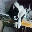

In [17]:
i = np.random.choice(range(len(y_train)))
display(y_train[i])
display(array_to_img(X_train_img[i].reshape(32,32,3)))

## GridSearch with Keras Models

### HyperParameter Tuning with GridSearchCV & Keras

Original Source: https://chrisalbon.com/deep_learning/keras/tuning_neural_network_hyperparameters/
<br><br>

- To use `GridSearchCV` or other similar functions in scikit-learn with a Keras neural network, we need to wrap our keras model in `keras.wrappers.scikit_learn`'s `KerasClassifier` and `KerasRegressor`.

1. To do this, we need to write a build function(`build_fn`) that creates our model such as `create_model`.
    - This function must accept whatever parameters you wish to tune. 
    - It also must have a default argument for each parameter.
    - This function must Return the model (and only the model)
    

```python

## Define the build function
def create_model(n_units=(50,25,7), activation='relu',final_activation='softmax',
                optimizer='adam'):
    
    ## Pro tip:save the local variables now so you can print out the parameters used to create the model.
    params_used = locals()
    print('Parameters for model:\n',params_used)
    
   
    from keras.models import Sequential
    from keras import layers
    
    model=Sequential()
    model.add(layers.Dense(n_units[0], activation=activation, input_shape=(2000,)))
    model.add(layers.Dense(n_units[1], activation=activation))
    model.add(layers.Dense(n_units[2], activation=final_activation))
    model.compile(optimizer=optimizer, loss='categorical_crossentropy',metrics=['accuracy'])
    
    display(model.summary())
    return model 
```    

2. We then create out model using the Keras wrapper:

```python
from keras.wrappers.scikit_learn import KerasClassifier
neural_network =  KerasClassifier(build_fn=create_model,verbose=1)
```

3. Now, set up the hyperparameter space for grid search. (Remember, your `create_model` function must accept the parameter you want to tune)

```python
params_to_test = {'n_units':[(50,25,7),(100,50,7)],
                  'optimizer':['adam','rmsprop','adadelta'],
                  'activation':['linear','relu','tanh'],
                  'final_activation':['softmax']}
```

4. Now instantiate your GridSearch function

```python
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(estimator=neural_network,param_grid=params_to_test)
grid_result = grid.fit(X_train, y_train)
best_params = grid_result.best_params_
```
5. And thats it!

### Functions

In [18]:
class Timer():
    ## def init
    def __init__(self,format_="%m/%d/%y - %I:%M %p"):
        import tzlocal
        self.tz = tzlocal.get_localzone()
        self.fmt = format_
        
        self.created_at = self.get_time()# get time
        
    
    ## def get time method
    def get_time(self):
        import datetime as dt
        return dt.datetime.now(self.tz)

    ## def start
    def start(self):
        time = self.get_time()
        self.start = time
        print(f"[i] Timer started at{self.start.strftime(self.fmt)}")

        

    ## def stop
    def stop(self):
        time = self.get_time()
        self.end = time
        print(f"[i] Timer ended at {self.end.strftime(self.fmt)}")
        print(f"- Total time = {self.end-self.start}")

        
        
def plot_confusion_matrix(conf_matrix, classes = None, normalize=True,
                          title='Confusion Matrix', cmap="Blues",
                          print_raw_matrix=False,
                          fig_size=(4,4)):
    """Check if Normalization Option is Set to True. 
    If so, normalize the raw confusion matrix before visualizing
    #Other code should be equivalent to your previous function.
    Note: Taken from bs_ds and modified
    - Can pass a tuple of (y_true,y_pred) instead of conf matrix.
    """
    import itertools
    import numpy as np
    import matplotlib.pyplot as plt
    import sklearn.metrics as metrics
    
    ## make confusion matrix if given tuple of y_true,y_pred
    if isinstance(conf_matrix, tuple):
        y_true = conf_matrix[0].copy()
        y_pred = conf_matrix[1].copy()
        
        if y_true.ndim>1:
            y_true = y_true.argmax(axis=1)
        if y_pred.ndim>1:
            y_pred = y_pred.argmax(axis=1)
            
            
        cm = metrics.confusion_matrix(y_true,y_pred)
    else:
        cm = conf_matrix
        
    ## Generate integer labels for classes
    if classes is None:
        classes = list(range(len(cm)))  
        
    ## Normalize data
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        fmt='.2f'
    else:
        fmt= 'd'
        
        
    fontDict = {
        'title':{
            'fontsize':16,
            'fontweight':'semibold',
            'ha':'center',
            },
        'xlabel':{
            'fontsize':14,
            'fontweight':'normal',
            },
        'ylabel':{
            'fontsize':14,
            'fontweight':'normal',
            },
        'xtick_labels':{
            'fontsize':10,
            'fontweight':'normal',
    #             'rotation':45,
            'ha':'right',
            },
        'ytick_labels':{
            'fontsize':10,
            'fontweight':'normal',
            'rotation':0,
            'ha':'right',
            },
        'data_labels':{
            'ha':'center',
            'fontweight':'semibold',

        }
    }

    # Create plot
    fig,ax = plt.subplots(figsize=fig_size)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title,**fontDict['title'])
    plt.colorbar()

    tick_marks = classes#np.arange(len(classes))

    plt.xticks(tick_marks, classes, **fontDict['xtick_labels'])
    plt.yticks(tick_marks, classes,**fontDict['ytick_labels'])

    # Determine threshold for b/w text
    thresh = cm.max() / 2.

    # fig,ax = plt.subplots()
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 color='darkgray',**fontDict['data_labels']) #color="white" if cm[i, j] > thresh else "black"

    plt.tight_layout()
    plt.ylabel('True label',**fontDict['ylabel'])
    plt.xlabel('Predicted label',**fontDict['xlabel'])

    if print_raw_matrix:
        print_title = 'Raw Confusion Matrix Counts:'
        print('\n',print_title)
        print(conf_matrix)


    fig = plt.gcf()
    return fig



def plot_keras_history(history,figsize_1=(6,4),
    figsize_2=(8,6)):
    """Plots keras history and returns fig"""
    
    ## Make a df from history
    if isinstance(history,dict)==False:
        history=history.history
    plot_df = pd.DataFrame(history)
    plot_df['Epoch'] = range(1,len(plot_df)+1)
    plot_df.set_index('Epoch',inplace=True)
    ## Get cols for acc vs loss
    acc_cols = list(filter(lambda x: 'acc' in x, plot_df.columns))
    loss_cols = list(filter(lambda x: 'loss' in x, plot_df.columns))   
    
    ## Set figsizes based on number of keys
    if len(acc_cols)>1:
        figsize=figsize_2
    else:
        figsize=figsize_1

    ## Make figure and axes
    fig,ax = plt.subplots(nrows=2,figsize=figsize,sharex=True)
    
    ## Plot Accuracy cols in plot 1
    plot_df[acc_cols].plot(ax=ax[0])
    ax[0].set(ylabel='Accuracy')
    ax[0].set_title('Training Results')

    ## Plot loss cols in plot 2
    plot_df[loss_cols].plot(ax=ax[1])
    ax[1].set(ylabel='Loss')
    ax[1].set_xlabel('Epoch #')


#     ## Change xaxis locators 
#     [a.xaxis.set_major_locator(mpl.ticker.MaxNLocator(len(plot_df),integer=True)) for a in ax]
#     [a.set_xlim((1,len(plot_df)+1)) for a in ax]
    plt.tight_layout()
    
    return fig

In [19]:
from keras.models import Sequential
from keras.layers import Dense
display(X_train_img.shape)
display(y_train.shape)

(7200, 3072)

(7200, 2)

In [20]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_img.shape[1],)))
model.add(Dense(2,activation='softmax'))
model.compile(loss='binary_crossentropy', optimizer='sgd',metrics=['accuracy'])

In [21]:
def make_model():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(X_train_img.shape[1],)))
    model.add(Dense(2,activation='softmax'))
    model.compile(loss='binary_crossentropy', optimizer='sgd',metrics=['accuracy'])
    return model

model = make_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                196672    
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 130       
Total params: 196,802
Trainable params: 196,802
Non-trainable params: 0
_________________________________________________________________


In [22]:
timer =Timer()
timer.start()

history = model.fit(X_train_img,y_train, epochs=100, batch_size=64,
                   validation_data=(X_val_img,y_val))

timer.stop()

[i] Timer started at06/01/20 - 09:42 PM
Train on 7200 samples, validate on 800 samples
Epoch 1/100
7200/7200 [==============================] - 0s 45us/step - loss: 0.6963 - accuracy: 0.5439 - val_loss: 0.6821 - val_accuracy: 0.5587
Epoch 2/100
7200/7200 [==============================] - 0s 28us/step - loss: 0.6683 - accuracy: 0.5814 - val_loss: 0.6777 - val_accuracy: 0.5612
Epoch 3/100
7200/7200 [==============================] - 0s 26us/step - loss: 0.6609 - accuracy: 0.5990 - val_loss: 0.7128 - val_accuracy: 0.5225
Epoch 4/100
7200/7200 [==============================] - 0s 25us/step - loss: 0.6543 - accuracy: 0.6090 - val_loss: 0.6712 - val_accuracy: 0.5763
Epoch 5/100
7200/7200 [==============================] - 0s 27us/step - loss: 0.6469 - accuracy: 0.6224 - val_loss: 0.7319 - val_accuracy: 0.5238
Epoch 6/100
7200/7200 [==============================] - 0s 25us/step - loss: 0.6434 - accuracy: 0.6260 - val_loss: 0.6727 - val_accuracy: 0.5813
Epoch 7/100
7200/7200 [==============

7200/7200 [==============================] - 0s 23us/step - loss: 0.4744 - accuracy: 0.7776 - val_loss: 0.7917 - val_accuracy: 0.5750
Epoch 57/100
7200/7200 [==============================] - 0s 31us/step - loss: 0.5011 - accuracy: 0.7621 - val_loss: 0.7352 - val_accuracy: 0.5962
Epoch 58/100
7200/7200 [==============================] - 0s 21us/step - loss: 0.4745 - accuracy: 0.7796 - val_loss: 0.6834 - val_accuracy: 0.6212
Epoch 59/100
7200/7200 [==============================] - 0s 22us/step - loss: 0.4699 - accuracy: 0.7768 - val_loss: 0.7268 - val_accuracy: 0.5975
Epoch 60/100
7200/7200 [==============================] - 0s 24us/step - loss: 0.4688 - accuracy: 0.7849 - val_loss: 1.0976 - val_accuracy: 0.5487
Epoch 61/100
7200/7200 [==============================] - 0s 23us/step - loss: 0.4788 - accuracy: 0.7772 - val_loss: 0.7312 - val_accuracy: 0.6125
Epoch 62/100
7200/7200 [==============================] - 0s 37us/step - loss: 0.4665 - accuracy: 0.7844 - val_loss: 0.7144 - val_a

In [23]:
# history.history

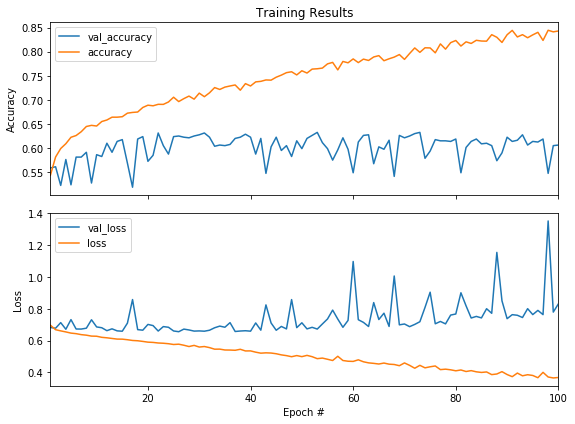

In [24]:
plot_keras_history(history);

In [25]:
y_hat_test= model.predict(X_test_img)
y_hat_test

array([[0.95813006, 0.04186993],
       [0.9736813 , 0.02631867],
       [0.43691748, 0.5630826 ],
       ...,
       [0.2851705 , 0.71482944],
       [0.22257644, 0.77742356],
       [0.5423336 , 0.4576664 ]], dtype=float32)

In [26]:
y_hat_test.ndim

2

In [27]:
y_hat_test.shape

(2000, 2)

In [28]:
y_hat_test = y_hat_test.argmax(axis=1)#.shape)
y_hat_test

array([0, 0, 1, ..., 1, 1, 0])

In [29]:
from sklearn import metrics
print(metrics.classification_report(y_test.argmax(axis=1),y_hat_test))

              precision    recall  f1-score   support

           0       0.50      0.21      0.29      1000
           1       0.50      0.79      0.61      1000

    accuracy                           0.50      2000
   macro avg       0.50      0.50      0.45      2000
weighted avg       0.50      0.50      0.45      2000



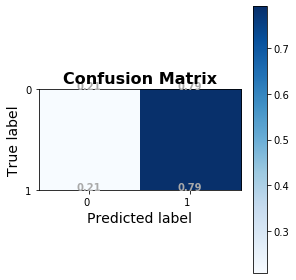

In [30]:
plot_confusion_matrix((y_test,y_hat_test));

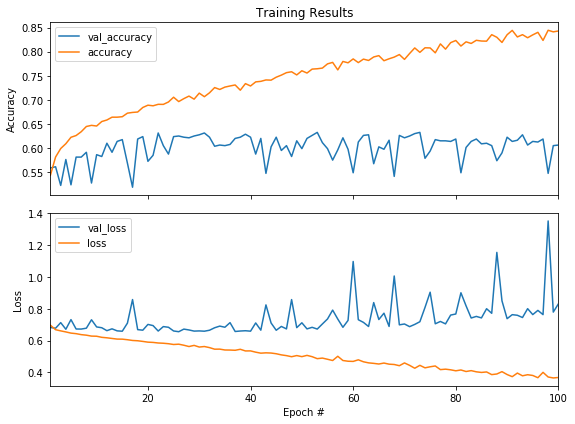



------------------------------------------------------------
	CLASSIFICATION REPORT:
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.50      0.21      0.29      1000
           1       0.50      0.79      0.61      1000

    accuracy                           0.50      2000
   macro avg       0.50      0.50      0.45      2000
weighted avg       0.50      0.50      0.45      2000



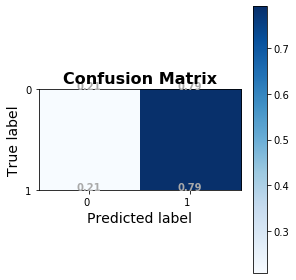

In [31]:
def evaluate_model(y_true, y_pred,history=None):
    """Evaluates neural network using sklearn metrics"""
    from sklearn import metrics
    if y_true.ndim>1:
        y_true = y_true.argmax(axis=1)
    if y_pred.ndim>1:
        y_pred = y_pred.argmax(axis=1)   
#     try:    
    if history is not None:
        plot_keras_history(history)
        plt.show()
#     except:
#         pass
    
    num_dashes=20
    print('\n')
    print('---'*num_dashes)
    print('\tCLASSIFICATION REPORT:')
    print('---'*num_dashes)
    try:
        print(metrics.classification_report(y_true,y_pred))
        
        fig = plot_confusion_matrix((y_true,y_pred))
        plt.show()
    except Exception as e:
        print(f"[!] Error during model evaluation:\n\t{e}")

evaluate_model(y_test,y_hat_test,history)

## Keras Callbacks



- [Official Callback documentation](https://keras.io/callbacks/)
- CallBacks You'll Definitely Want to Use
 - `keras.callbacks.ModelCheckpoint`
 - `keras.callbacks.EarlyStopping`

- Callbacks worth further exploration
 - `keras.callbacks.callbacks.LearningRateScheduler`
 - `keras.callbacks`

In [32]:
# checkpoint
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger

def create_checkpoint(monitor,model_subfolder):#='Datasets/Models/cat_vs_dog/'):
    filepath=model_subfolder+"weights-improvement-{epoch:02d}-{"+monitor+":.2f}.hdf5"
    checkpoint = ModelCheckpoint(filepath, monitor=monitor, verbose=1, save_best_only=True, mode='max')
    return checkpoint


def create_early_stopping(monitor = 'val_accuracy',min_delta = 0, patience = 10,
                          verbose = 1, restore_best_weights = True):

    args = locals()
    earlystop = EarlyStopping(**args)
    return earlystop


def get_callbacks(early_stop_kws={}, checkpoint_kws={}):
    model_subfolder=base_folder+'Models/'
    os.makedirs(model_subfolder,exist_ok=True)

    callbacks_list = [create_checkpoint('val_accuracy',
                                        model_subfolder=model_subfolder,**checkpoint_kws),
                      create_early_stopping(**early_stop_kws)]
    return callbacks_list

In [33]:
def make_model():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(X_train_img.shape[1],)))
    model.add(Dense(2,activation='softmax'))
    model.compile(loss='binary_crossentropy', optimizer='sgd',metrics=['accuracy'])
    return model

In [34]:
callback_list = get_callbacks()
callback_list

In [35]:
timer =Timer()
timer.start()
model = make_model()
history = model.fit(X_train_img,y_train, epochs=100, batch_size=64,
                   validation_data=(X_val_img,y_val),
                   callbacks=callback_list)

timer.stop()

[i] Timer started at06/01/20 - 09:42 PM
Train on 7200 samples, validate on 800 samples
Epoch 1/100
7200/7200 [==============================] - 0s 38us/step - loss: 0.6971 - accuracy: 0.5444 - val_loss: 0.6761 - val_accuracy: 0.5738

Epoch 00001: val_accuracy improved from -inf to 0.57375, saving model to /Users/jamesirving/Datasets/dogs-vs-cats-sorted/Models/weights-improvement-01-0.57.hdf5
Epoch 2/100
7200/7200 [==============================] - 0s 26us/step - loss: 0.6710 - accuracy: 0.5899 - val_loss: 0.6788 - val_accuracy: 0.5612

Epoch 00002: val_accuracy did not improve from 0.57375
Epoch 3/100
7200/7200 [==============================] - 0s 25us/step - loss: 0.6580 - accuracy: 0.6090 - val_loss: 0.6711 - val_accuracy: 0.5725

Epoch 00003: val_accuracy did not improve from 0.57375
Epoch 4/100
7200/7200 [==============================] - 0s 26us/step - loss: 0.6508 - accuracy: 0.6112 - val_loss: 0.6892 - val_accuracy: 0.5638

Epoch 00004: val_accuracy did not improve from 0.57375

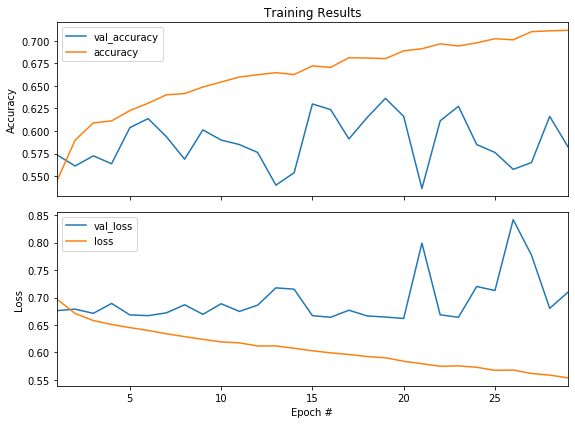



------------------------------------------------------------
	CLASSIFICATION REPORT:
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.50      0.38      0.43      1000
           1       0.50      0.62      0.55      1000

    accuracy                           0.50      2000
   macro avg       0.50      0.50      0.49      2000
weighted avg       0.50      0.50      0.49      2000



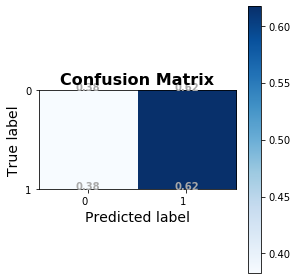

In [36]:
y_hat_test = model.predict(X_test_img)
evaluate_model(y_test,y_hat_test,history)

## How to Make a Custom Scoring Function

1. **Why would you do this?**
    1. You may want to use a metric that isn't available in sklearn. 
        - In the included `my_custom_scorer` function, I take the accuracy of each class's predictions from the diagonal of a normalized confusion matrix. 
        - I then calculate the mean of those 3 class accuracies, which is the `score` that is returned to the gridsearch. 
        
    2. You may want to add a printout or display to the scoring function so you can see the results as the search is going.
<br><br>
2. **How do you do write your own?**
    1. Define your custom scoring function.
        - It must accept `y_true`,`y_pred`
        - It must return a value to maximize. (like accuracy)
    2. You can add print or display commands to have the scoring function report the current results as the gridsearch is still going.
        - If you combine this with the example `create_model` function above that includes the `vars=locals(); print(vars)` command, then gridsearch will display:
            1. the parameters of each model (each time the `create_model` function is called.
            2. The score of each model, including a confusion matrix figure (each time it calls `my_custom_scorer`).
        
```python
def my_custom_scorer(y_true,y_pred):
    """My custom score function to use with sklearn's GridSearchCV
    Maximizes the average accuracy per class using a normalized confusion matrix"""
    from sklearn.metrics import confusion_matrix
    import numpy as np
    import functions_combined_BEST as ji    

    ## Flatten one-hot encoded target columns into 1 column for sklearn functions
    if y_true.ndim>1 or y_pred.ndim>1:
        
        ## reduce dimensions of y_train and y_test
        if y_true.ndim>1:            
            y_true = y_true.argmax(axis=1)
        
        if y_pred.ndim>1:
            y_pred = y_pred.argmax(axis=1)

    
     # Get confusion matrx
    cm = confusion_matrix(y_true, y_pred)

    # Normalize confusion matrix
    cm_norm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]

    ## Get diagonals for class accuracy
    diag = cm_norm.diagonal()
    
    # Get the mean of the diagonal values
    score = np.mean(diag)
    
    ## Display Results for the User
    print(f'Mean Class Accuracy = {score}')
    print(f'Class Accuracy Values:')
    print(diag)    

    ## Plot the confusion matrix.
    ji.plot_confusion_matrix(cm,normalize=True)

    # return the score 
    return score
```        
        
        
3. **How do you use it?**
    - When instantiating GridSearchCV pass your function as the `scoring=` parameter, wrapped in the  `sklearn.metrics.make_scorer` function.
  

```python
## Using custom scoring function
from sklearn.metrics import make_scorer

grid = GridSearchCV(estimator=neural_network, 
                    param_grid=params_to_test,
                   scoring=make_scorer(my_custom_scorer))
                    
grid_result = grid.fit(X_train, y_train)
```

In [37]:
from sklearn.model_selection import GridSearchCV
def make_model_optimized(optimizer='adam',activation_fn='relu',n_units=64,n_units2=32,
                         second_layer=True):
    
    ## Save input arguments to print at the bottom
    params=locals()
    
    ## Build <odel
    model = Sequential()
    model.add(Dense(n_units, activation=activation_fn, input_shape=(X_train_img.shape[1],)))
    
    if second_layer:
        model.add(Dense(n_units2, activation=activation_fn))

    model.add(Dense(2,activation='softmax'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=['accuracy'])
    
    ## Print model info
    dashes = '---'*25
    print('\n\n')
    print(dashes)
    print(dashes)
    print('[i] Current Params = ',end="{\n")
    [print(f"\t\t{k} : {v},") for k,v in params.items()]
    print("\t\t}")
    display(model.summary())
    return model

In [38]:
from sklearn.metrics import make_scorer, recall_score
from sklearn.metrics import make_scorer

def my_custom_scorer(y_true,y_pred,verbose=True):#,scoring='accuracy',verbose=True):
    """My custom score function to use with sklearn's GridSearchCV
    Maximizes the average accuracy per class using a normalized confusion matrix"""

    import sklearn.metrics as metrics
    from sklearn.metrics import confusion_matrix
    import numpy as np

    ## reduce dimensions of y_train and y_test
    if y_true.ndim>1:            
        y_true = y_true.argmax(axis=1)

    if y_pred.ndim>1:
        y_pred = y_pred.argmax(axis=1)
        
    evaluate_model(y_true,y_pred)
    print('\n\n')
    
#     score = metrics.recall_score(y_true,y_pred,average='weighted')
    score = metrics.accuracy_score(y_true,y_pred)
    return score



In [39]:
from keras.wrappers.scikit_learn import KerasClassifier
model=KerasClassifier(build_fn=make_model_optimized)

# callbacks = get_callbacks(early_stop_kws={'patience':10})
# fit_kwargs=dict( epochs=[50], batch_size=[64],
#                    validation_data=[(X_val_img,y_val)])#,callbacks=callbacks)
param_grid= {'optimizer':['adam','rmsprop'],
            'second_layer':[True, False],
            'activation_fn':['relu','tanh']}#,
#             'epochs':[50],
#             'batch_size':[64]}
param_grid

{'optimizer': ['adam', 'rmsprop'],
 'second_layer': [True, False],
 'activation_fn': ['relu', 'tanh']}




---------------------------------------------------------------------------
---------------------------------------------------------------------------
[i] Current Params = {
		second_layer : True,
		n_units2 : 32,
		n_units : 64,
		activation_fn : relu,
		optimizer : adam,
		}
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 64)                196672    
_________________________________________________________________
dense_8 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 66        
Total params: 198,818
Trainable params: 198,818
Non-trainable params: 0
_________________________________________________________________


None

Train on 4800 samples, validate on 800 samples
Epoch 1/50
4800/4800 [==============================] - 0s 85us/step - loss: 0.6975 - accuracy: 0.5350 - val_loss: 0.7088 - val_accuracy: 0.5362
Epoch 2/50
4800/4800 [==============================] - 0s 46us/step - loss: 0.6841 - accuracy: 0.5565 - val_loss: 0.6823 - val_accuracy: 0.5738
Epoch 3/50
4800/4800 [==============================] - 0s 43us/step - loss: 0.6814 - accuracy: 0.5740 - val_loss: 0.6718 - val_accuracy: 0.5650
Epoch 4/50
4800/4800 [==============================] - 0s 38us/step - loss: 0.6618 - accuracy: 0.6090 - val_loss: 0.6659 - val_accuracy: 0.5788
Epoch 5/50
4800/4800 [==============================] - 0s 38us/step - loss: 0.6541 - accuracy: 0.6050 - val_loss: 0.6900 - val_accuracy: 0.5713
Epoch 6/50
4800/4800 [==============================] - 0s 39us/step - loss: 0.6676 - accuracy: 0.5931 - val_loss: 0.7144 - val_accuracy: 0.5425
Epoch 7/50
4800/4800 [==============================] - 0s 39us/step - loss: 0.6371

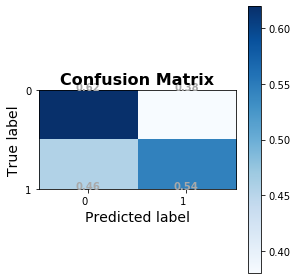







---------------------------------------------------------------------------
---------------------------------------------------------------------------
[i] Current Params = {
		second_layer : True,
		n_units2 : 32,
		n_units : 64,
		activation_fn : relu,
		optimizer : adam,
		}
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 64)                196672    
_________________________________________________________________
dense_11 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_12 (Dense)             (None, 2)                 66        
Total params: 198,818
Trainable params: 198,818
Non-trainable params: 0
_________________________________________________________________


None

Train on 4800 samples, validate on 800 samples
Epoch 1/50
4800/4800 [==============================] - 0s 68us/step - loss: 0.7070 - accuracy: 0.5300 - val_loss: 0.6925 - val_accuracy: 0.5337
Epoch 2/50
4800/4800 [==============================] - 0s 45us/step - loss: 0.6843 - accuracy: 0.5608 - val_loss: 0.6792 - val_accuracy: 0.5462
Epoch 3/50
4800/4800 [==============================] - 0s 40us/step - loss: 0.6714 - accuracy: 0.5908 - val_loss: 0.6715 - val_accuracy: 0.5725
Epoch 4/50
4800/4800 [==============================] - 0s 40us/step - loss: 0.6628 - accuracy: 0.5917 - val_loss: 0.6849 - val_accuracy: 0.5688
Epoch 5/50
4800/4800 [==============================] - 0s 35us/step - loss: 0.6484 - accuracy: 0.6140 - val_loss: 0.6919 - val_accuracy: 0.5425
Epoch 6/50
4800/4800 [==============================] - 0s 35us/step - loss: 0.6492 - accuracy: 0.6121 - val_loss: 0.6751 - val_accuracy: 0.5962
Epoch 7/50
4800/4800 [==============================] - 0s 36us/step - loss: 0.6352

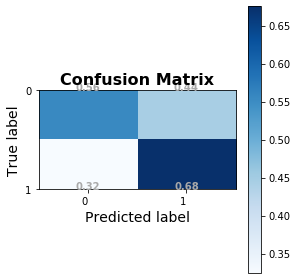







---------------------------------------------------------------------------
---------------------------------------------------------------------------
[i] Current Params = {
		second_layer : True,
		n_units2 : 32,
		n_units : 64,
		activation_fn : relu,
		optimizer : adam,
		}
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 64)                196672    
_________________________________________________________________
dense_14 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_15 (Dense)             (None, 2)                 66        
Total params: 198,818
Trainable params: 198,818
Non-trainable params: 0
_________________________________________________________________


None

Train on 4800 samples, validate on 800 samples
Epoch 1/50
4800/4800 [==============================] - 0s 81us/step - loss: 0.7138 - accuracy: 0.5246 - val_loss: 0.6973 - val_accuracy: 0.5138
Epoch 2/50
4800/4800 [==============================] - 0s 43us/step - loss: 0.6783 - accuracy: 0.5713 - val_loss: 0.6877 - val_accuracy: 0.5562
Epoch 3/50
4800/4800 [==============================] - 0s 43us/step - loss: 0.6740 - accuracy: 0.5854 - val_loss: 0.6951 - val_accuracy: 0.5375
Epoch 4/50
4800/4800 [==============================] - 0s 43us/step - loss: 0.6664 - accuracy: 0.5962 - val_loss: 0.6770 - val_accuracy: 0.5863
Epoch 5/50
4800/4800 [==============================] - 0s 43us/step - loss: 0.6548 - accuracy: 0.6142 - val_loss: 0.6877 - val_accuracy: 0.5750
Epoch 6/50
4800/4800 [==============================] - 0s 40us/step - loss: 0.6487 - accuracy: 0.6212 - val_loss: 0.6803 - val_accuracy: 0.5875
Epoch 7/50
4800/4800 [==============================] - ETA: 0s - loss: 0.6501 - ac

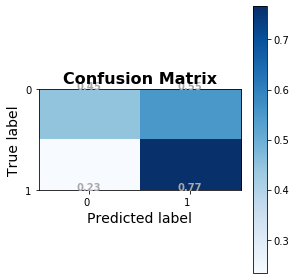







---------------------------------------------------------------------------
---------------------------------------------------------------------------
[i] Current Params = {
		second_layer : False,
		n_units2 : 32,
		n_units : 64,
		activation_fn : relu,
		optimizer : adam,
		}
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 64)                196672    
_________________________________________________________________
dense_17 (Dense)             (None, 2)                 130       
Total params: 196,802
Trainable params: 196,802
Non-trainable params: 0
_________________________________________________________________


None

Train on 4800 samples, validate on 800 samples
Epoch 1/50
4800/4800 [==============================] - 0s 80us/step - loss: 0.7365 - accuracy: 0.5362 - val_loss: 0.6808 - val_accuracy: 0.5688
Epoch 2/50
4800/4800 [==============================] - 0s 48us/step - loss: 0.6881 - accuracy: 0.5663 - val_loss: 0.6714 - val_accuracy: 0.5738
Epoch 3/50
4800/4800 [==============================] - 0s 42us/step - loss: 0.6661 - accuracy: 0.6058 - val_loss: 0.6760 - val_accuracy: 0.5850
Epoch 4/50
4800/4800 [==============================] - 0s 48us/step - loss: 0.6554 - accuracy: 0.6090 - val_loss: 0.6777 - val_accuracy: 0.5888
Epoch 5/50
4800/4800 [==============================] - 0s 45us/step - loss: 0.6467 - accuracy: 0.6315 - val_loss: 0.6812 - val_accuracy: 0.5587
Epoch 6/50
4800/4800 [==============================] - 0s 47us/step - loss: 0.6414 - accuracy: 0.6327 - val_loss: 0.6689 - val_accuracy: 0.5975
Epoch 7/50
4800/4800 [==============================] - 0s 53us/step - loss: 0.6298

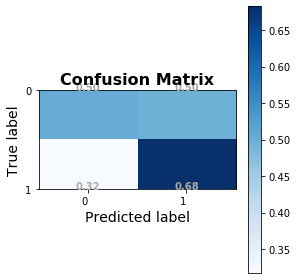







---------------------------------------------------------------------------
---------------------------------------------------------------------------
[i] Current Params = {
		second_layer : False,
		n_units2 : 32,
		n_units : 64,
		activation_fn : relu,
		optimizer : adam,
		}
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 64)                196672    
_________________________________________________________________
dense_19 (Dense)             (None, 2)                 130       
Total params: 196,802
Trainable params: 196,802
Non-trainable params: 0
_________________________________________________________________


None

Train on 4800 samples, validate on 800 samples
Epoch 1/50
4800/4800 [==============================] - 0s 66us/step - loss: 0.7307 - accuracy: 0.5279 - val_loss: 0.6998 - val_accuracy: 0.5512
Epoch 2/50
4800/4800 [==============================] - 0s 42us/step - loss: 0.6721 - accuracy: 0.5821 - val_loss: 0.6744 - val_accuracy: 0.5612
Epoch 3/50
4800/4800 [==============================] - 0s 40us/step - loss: 0.6690 - accuracy: 0.5921 - val_loss: 0.6864 - val_accuracy: 0.5675
Epoch 4/50
4800/4800 [==============================] - 0s 38us/step - loss: 0.6491 - accuracy: 0.6267 - val_loss: 0.6843 - val_accuracy: 0.5738
Epoch 5/50
4800/4800 [==============================] - 0s 39us/step - loss: 0.6428 - accuracy: 0.6275 - val_loss: 0.7114 - val_accuracy: 0.5500
Epoch 6/50
4800/4800 [==============================] - 0s 36us/step - loss: 0.6436 - accuracy: 0.6198 - val_loss: 0.6688 - val_accuracy: 0.5900
Epoch 7/50
4800/4800 [==============================] - 0s 39us/step - loss: 0.6403

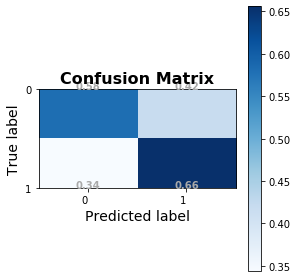







---------------------------------------------------------------------------
---------------------------------------------------------------------------
[i] Current Params = {
		second_layer : False,
		n_units2 : 32,
		n_units : 64,
		activation_fn : relu,
		optimizer : adam,
		}
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 64)                196672    
_________________________________________________________________
dense_21 (Dense)             (None, 2)                 130       
Total params: 196,802
Trainable params: 196,802
Non-trainable params: 0
_________________________________________________________________


None

Train on 4800 samples, validate on 800 samples
Epoch 1/50
4800/4800 [==============================] - 0s 67us/step - loss: 0.7063 - accuracy: 0.5442 - val_loss: 0.6919 - val_accuracy: 0.5412
Epoch 2/50
4800/4800 [==============================] - 0s 40us/step - loss: 0.6802 - accuracy: 0.5677 - val_loss: 0.6754 - val_accuracy: 0.5462
Epoch 3/50
4800/4800 [==============================] - 0s 37us/step - loss: 0.6882 - accuracy: 0.5667 - val_loss: 0.7474 - val_accuracy: 0.5000
Epoch 4/50
4800/4800 [==============================] - 0s 34us/step - loss: 0.6598 - accuracy: 0.6081 - val_loss: 0.6655 - val_accuracy: 0.5675
Epoch 5/50
4800/4800 [==============================] - 0s 36us/step - loss: 0.6557 - accuracy: 0.6146 - val_loss: 0.6656 - val_accuracy: 0.5850
Epoch 6/50
4800/4800 [==============================] - 0s 41us/step - loss: 0.6569 - accuracy: 0.6119 - val_loss: 0.6943 - val_accuracy: 0.5400
Epoch 7/50
4800/4800 [==============================] - 0s 44us/step - loss: 0.6481

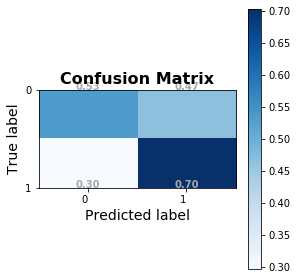







---------------------------------------------------------------------------
---------------------------------------------------------------------------
[i] Current Params = {
		second_layer : True,
		n_units2 : 32,
		n_units : 64,
		activation_fn : relu,
		optimizer : rmsprop,
		}
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 64)                196672    
_________________________________________________________________
dense_23 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_24 (Dense)             (None, 2)                 66        
Total params: 198,818
Trainable params: 198,818
Non-trainable params: 0
_________________________________________________________________


None

Train on 4800 samples, validate on 800 samples
Epoch 1/50
4800/4800 [==============================] - 0s 61us/step - loss: 1.1236 - accuracy: 0.5042 - val_loss: 1.0213 - val_accuracy: 0.5288
Epoch 2/50
4800/4800 [==============================] - 0s 35us/step - loss: 0.7392 - accuracy: 0.5154 - val_loss: 0.6921 - val_accuracy: 0.5200
Epoch 3/50
4800/4800 [==============================] - 0s 31us/step - loss: 0.6934 - accuracy: 0.5306 - val_loss: 0.6843 - val_accuracy: 0.5487
Epoch 4/50
4800/4800 [==============================] - 0s 31us/step - loss: 0.6886 - accuracy: 0.5544 - val_loss: 0.6849 - val_accuracy: 0.5487
Epoch 5/50
4800/4800 [==============================] - 0s 35us/step - loss: 0.6751 - accuracy: 0.5881 - val_loss: 0.6915 - val_accuracy: 0.5650
Epoch 6/50
4800/4800 [==============================] - 0s 38us/step - loss: 0.6692 - accuracy: 0.5840 - val_loss: 0.7046 - val_accuracy: 0.5312
Epoch 7/50
4800/4800 [==============================] - 0s 32us/step - loss: 0.6605

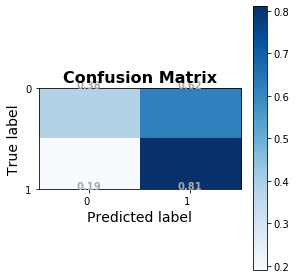







---------------------------------------------------------------------------
---------------------------------------------------------------------------
[i] Current Params = {
		second_layer : True,
		n_units2 : 32,
		n_units : 64,
		activation_fn : relu,
		optimizer : rmsprop,
		}
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 64)                196672    
_________________________________________________________________
dense_26 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_27 (Dense)             (None, 2)                 66        
Total params: 198,818
Trainable params: 198,818
Non-trainable params: 0
_________________________________________________________________


None

Train on 4800 samples, validate on 800 samples
Epoch 1/50
4800/4800 [==============================] - 0s 63us/step - loss: 0.7908 - accuracy: 0.5090 - val_loss: 0.7005 - val_accuracy: 0.5275
Epoch 2/50
4800/4800 [==============================] - 0s 35us/step - loss: 0.7033 - accuracy: 0.5235 - val_loss: 0.6803 - val_accuracy: 0.5600
Epoch 3/50
4800/4800 [==============================] - 0s 33us/step - loss: 0.6891 - accuracy: 0.5598 - val_loss: 0.6798 - val_accuracy: 0.5487
Epoch 4/50
4800/4800 [==============================] - 0s 30us/step - loss: 0.6777 - accuracy: 0.5829 - val_loss: 0.6757 - val_accuracy: 0.5900
Epoch 5/50
4800/4800 [==============================] - 0s 32us/step - loss: 0.6700 - accuracy: 0.5948 - val_loss: 0.6682 - val_accuracy: 0.5900
Epoch 6/50
4800/4800 [==============================] - 0s 30us/step - loss: 0.6642 - accuracy: 0.6002 - val_loss: 0.6887 - val_accuracy: 0.5550
Epoch 7/50
4800/4800 [==============================] - 0s 29us/step - loss: 0.6576

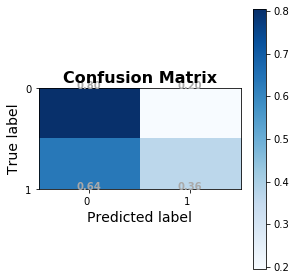







---------------------------------------------------------------------------
---------------------------------------------------------------------------
[i] Current Params = {
		second_layer : True,
		n_units2 : 32,
		n_units : 64,
		activation_fn : relu,
		optimizer : rmsprop,
		}
Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 64)                196672    
_________________________________________________________________
dense_29 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_30 (Dense)             (None, 2)                 66        
Total params: 198,818
Trainable params: 198,818
Non-trainable params: 0
_________________________________________________________________


None

Train on 4800 samples, validate on 800 samples
Epoch 1/50
4800/4800 [==============================] - 0s 59us/step - loss: 0.9444 - accuracy: 0.5000 - val_loss: 0.7660 - val_accuracy: 0.5288
Epoch 2/50
4800/4800 [==============================] - 0s 32us/step - loss: 0.7467 - accuracy: 0.5323 - val_loss: 0.7357 - val_accuracy: 0.4787
Epoch 3/50
4800/4800 [==============================] - 0s 30us/step - loss: 0.7048 - accuracy: 0.5362 - val_loss: 0.7743 - val_accuracy: 0.4787
Epoch 4/50
4800/4800 [==============================] - 0s 30us/step - loss: 0.6889 - accuracy: 0.5606 - val_loss: 0.6798 - val_accuracy: 0.5713
Epoch 5/50
4800/4800 [==============================] - 0s 31us/step - loss: 0.6736 - accuracy: 0.5821 - val_loss: 0.6872 - val_accuracy: 0.5738
Epoch 6/50
4800/4800 [==============================] - 0s 30us/step - loss: 0.6676 - accuracy: 0.5952 - val_loss: 0.6842 - val_accuracy: 0.5612
Epoch 7/50
4800/4800 [==============================] - 0s 30us/step - loss: 0.6604

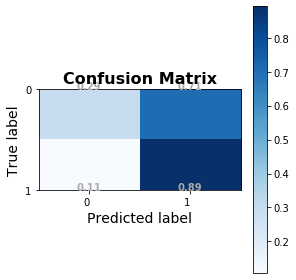







---------------------------------------------------------------------------
---------------------------------------------------------------------------
[i] Current Params = {
		second_layer : False,
		n_units2 : 32,
		n_units : 64,
		activation_fn : relu,
		optimizer : rmsprop,
		}
Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 64)                196672    
_________________________________________________________________
dense_32 (Dense)             (None, 2)                 130       
Total params: 196,802
Trainable params: 196,802
Non-trainable params: 0
_________________________________________________________________


None

Train on 4800 samples, validate on 800 samples
Epoch 1/50
4800/4800 [==============================] - 0s 52us/step - loss: 0.8851 - accuracy: 0.5110 - val_loss: 0.6999 - val_accuracy: 0.5288
Epoch 2/50
4800/4800 [==============================] - 0s 31us/step - loss: 0.6900 - accuracy: 0.5304 - val_loss: 0.6874 - val_accuracy: 0.5437
Epoch 3/50
4800/4800 [==============================] - 0s 29us/step - loss: 0.6830 - accuracy: 0.5646 - val_loss: 0.6911 - val_accuracy: 0.5113
Epoch 4/50
4800/4800 [==============================] - 0s 30us/step - loss: 0.6785 - accuracy: 0.5698 - val_loss: 0.6788 - val_accuracy: 0.5600
Epoch 5/50
4800/4800 [==============================] - 0s 29us/step - loss: 0.6706 - accuracy: 0.5790 - val_loss: 0.6759 - val_accuracy: 0.5575
Epoch 6/50
4800/4800 [==============================] - 0s 30us/step - loss: 0.6683 - accuracy: 0.5846 - val_loss: 0.6726 - val_accuracy: 0.5663
Epoch 7/50
4800/4800 [==============================] - 0s 29us/step - loss: 0.6660

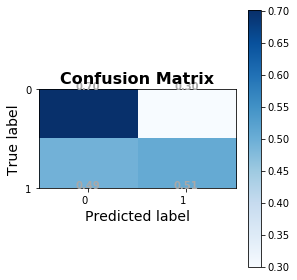







---------------------------------------------------------------------------
---------------------------------------------------------------------------
[i] Current Params = {
		second_layer : False,
		n_units2 : 32,
		n_units : 64,
		activation_fn : relu,
		optimizer : rmsprop,
		}
Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 64)                196672    
_________________________________________________________________
dense_34 (Dense)             (None, 2)                 130       
Total params: 196,802
Trainable params: 196,802
Non-trainable params: 0
_________________________________________________________________


None

Train on 4800 samples, validate on 800 samples
Epoch 1/50
4800/4800 [==============================] - 0s 52us/step - loss: 0.8688 - accuracy: 0.5169 - val_loss: 0.6970 - val_accuracy: 0.5188
Epoch 2/50
4800/4800 [==============================] - 0s 29us/step - loss: 0.6993 - accuracy: 0.5375 - val_loss: 0.6843 - val_accuracy: 0.5813
Epoch 3/50
4800/4800 [==============================] - 0s 30us/step - loss: 0.6840 - accuracy: 0.5696 - val_loss: 0.6972 - val_accuracy: 0.5475
Epoch 4/50
4800/4800 [==============================] - 0s 28us/step - loss: 0.6865 - accuracy: 0.5650 - val_loss: 0.6723 - val_accuracy: 0.5700
Epoch 5/50
4800/4800 [==============================] - 0s 28us/step - loss: 0.6713 - accuracy: 0.5888 - val_loss: 0.6767 - val_accuracy: 0.5788
Epoch 6/50
4800/4800 [==============================] - 0s 27us/step - loss: 0.6633 - accuracy: 0.5948 - val_loss: 0.6820 - val_accuracy: 0.5688
Epoch 7/50
4800/4800 [==============================] - 0s 27us/step - loss: 0.6575

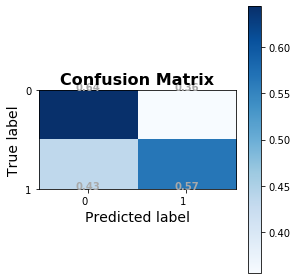







---------------------------------------------------------------------------
---------------------------------------------------------------------------
[i] Current Params = {
		second_layer : False,
		n_units2 : 32,
		n_units : 64,
		activation_fn : relu,
		optimizer : rmsprop,
		}
Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 64)                196672    
_________________________________________________________________
dense_36 (Dense)             (None, 2)                 130       
Total params: 196,802
Trainable params: 196,802
Non-trainable params: 0
_________________________________________________________________


None

Train on 4800 samples, validate on 800 samples
Epoch 1/50
4800/4800 [==============================] - 0s 49us/step - loss: 1.0146 - accuracy: 0.5100 - val_loss: 0.8163 - val_accuracy: 0.4775
Epoch 2/50
4800/4800 [==============================] - 0s 28us/step - loss: 0.8218 - accuracy: 0.5142 - val_loss: 0.7356 - val_accuracy: 0.4875
Epoch 3/50
4800/4800 [==============================] - 0s 29us/step - loss: 0.7515 - accuracy: 0.5337 - val_loss: 0.8770 - val_accuracy: 0.4750
Epoch 4/50
4800/4800 [==============================] - 0s 29us/step - loss: 0.7265 - accuracy: 0.5487 - val_loss: 0.7968 - val_accuracy: 0.4850
Epoch 5/50
4800/4800 [==============================] - 0s 27us/step - loss: 0.7091 - accuracy: 0.5498 - val_loss: 0.6877 - val_accuracy: 0.5550
Epoch 6/50
4800/4800 [==============================] - 0s 28us/step - loss: 0.6982 - accuracy: 0.5644 - val_loss: 0.7236 - val_accuracy: 0.5163
Epoch 7/50
4800/4800 [==============================] - 0s 27us/step - loss: 0.6896

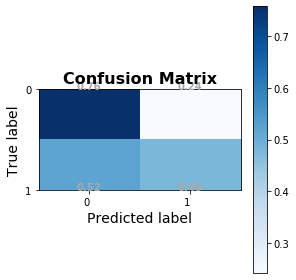







---------------------------------------------------------------------------
---------------------------------------------------------------------------
[i] Current Params = {
		second_layer : True,
		n_units2 : 32,
		n_units : 64,
		activation_fn : tanh,
		optimizer : adam,
		}
Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 64)                196672    
_________________________________________________________________
dense_38 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_39 (Dense)             (None, 2)                 66        
Total params: 198,818
Trainable params: 198,818
Non-trainable params: 0
_________________________________________________________________


None

Train on 4800 samples, validate on 800 samples
Epoch 1/50
4800/4800 [==============================] - 0s 59us/step - loss: 0.7894 - accuracy: 0.4925 - val_loss: 0.6911 - val_accuracy: 0.5263
Epoch 2/50
4800/4800 [==============================] - 0s 35us/step - loss: 0.6929 - accuracy: 0.5131 - val_loss: 0.6959 - val_accuracy: 0.4712
Epoch 3/50
4800/4800 [==============================] - 0s 32us/step - loss: 0.6969 - accuracy: 0.4952 - val_loss: 0.6909 - val_accuracy: 0.5337
Epoch 4/50
4800/4800 [==============================] - 0s 31us/step - loss: 0.6912 - accuracy: 0.5335 - val_loss: 0.6897 - val_accuracy: 0.5238
Epoch 5/50
4800/4800 [==============================] - 0s 30us/step - loss: 0.6848 - accuracy: 0.5590 - val_loss: 0.6959 - val_accuracy: 0.5150
Epoch 6/50
4800/4800 [==============================] - 0s 32us/step - loss: 0.6784 - accuracy: 0.5717 - val_loss: 0.6886 - val_accuracy: 0.5412
Epoch 7/50
4800/4800 [==============================] - 0s 30us/step - loss: 0.6787

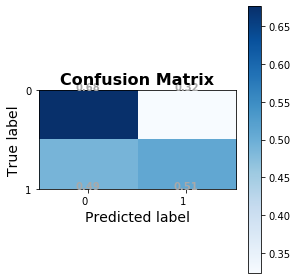







---------------------------------------------------------------------------
---------------------------------------------------------------------------
[i] Current Params = {
		second_layer : True,
		n_units2 : 32,
		n_units : 64,
		activation_fn : tanh,
		optimizer : adam,
		}
Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 64)                196672    
_________________________________________________________________
dense_41 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_42 (Dense)             (None, 2)                 66        
Total params: 198,818
Trainable params: 198,818
Non-trainable params: 0
_________________________________________________________________


None

Train on 4800 samples, validate on 800 samples
Epoch 1/50
4800/4800 [==============================] - 0s 64us/step - loss: 0.7883 - accuracy: 0.5029 - val_loss: 0.6970 - val_accuracy: 0.4675
Epoch 2/50
4800/4800 [==============================] - 0s 34us/step - loss: 0.6946 - accuracy: 0.5038 - val_loss: 0.6929 - val_accuracy: 0.4938
Epoch 3/50
4800/4800 [==============================] - 0s 32us/step - loss: 0.6916 - accuracy: 0.5133 - val_loss: 0.7039 - val_accuracy: 0.4762
Epoch 4/50
4800/4800 [==============================] - 0s 31us/step - loss: 0.6963 - accuracy: 0.5065 - val_loss: 0.6915 - val_accuracy: 0.5337
Epoch 5/50
4800/4800 [==============================] - 0s 33us/step - loss: 0.6914 - accuracy: 0.5375 - val_loss: 0.6977 - val_accuracy: 0.5000
Epoch 6/50
4800/4800 [==============================] - 0s 32us/step - loss: 0.6858 - accuracy: 0.5558 - val_loss: 0.6887 - val_accuracy: 0.5612
Epoch 7/50
4800/4800 [==============================] - 0s 31us/step - loss: 0.6810

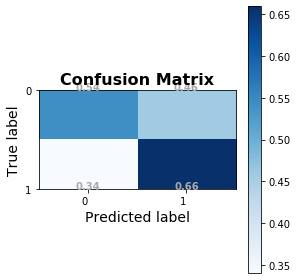







---------------------------------------------------------------------------
---------------------------------------------------------------------------
[i] Current Params = {
		second_layer : True,
		n_units2 : 32,
		n_units : 64,
		activation_fn : tanh,
		optimizer : adam,
		}
Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 64)                196672    
_________________________________________________________________
dense_44 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_45 (Dense)             (None, 2)                 66        
Total params: 198,818
Trainable params: 198,818
Non-trainable params: 0
_________________________________________________________________


None

Train on 4800 samples, validate on 800 samples
Epoch 1/50
4800/4800 [==============================] - 0s 71us/step - loss: 0.7379 - accuracy: 0.5142 - val_loss: 0.6986 - val_accuracy: 0.4800
Epoch 2/50
4800/4800 [==============================] - 0s 37us/step - loss: 0.6906 - accuracy: 0.5412 - val_loss: 0.6890 - val_accuracy: 0.5487
Epoch 3/50
4800/4800 [==============================] - 0s 35us/step - loss: 0.6829 - accuracy: 0.5648 - val_loss: 0.6826 - val_accuracy: 0.5562
Epoch 4/50
4800/4800 [==============================] - 0s 35us/step - loss: 0.6773 - accuracy: 0.5802 - val_loss: 0.6874 - val_accuracy: 0.5663
Epoch 5/50
4800/4800 [==============================] - 0s 36us/step - loss: 0.6797 - accuracy: 0.5667 - val_loss: 0.6818 - val_accuracy: 0.5475
Epoch 6/50
4800/4800 [==============================] - 0s 35us/step - loss: 0.6696 - accuracy: 0.5877 - val_loss: 0.6839 - val_accuracy: 0.5638
Epoch 7/50
4800/4800 [==============================] - 0s 34us/step - loss: 0.6673

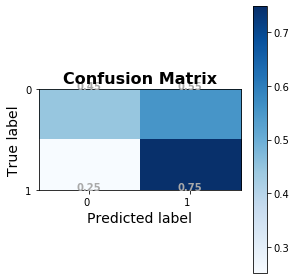







---------------------------------------------------------------------------
---------------------------------------------------------------------------
[i] Current Params = {
		second_layer : False,
		n_units2 : 32,
		n_units : 64,
		activation_fn : tanh,
		optimizer : adam,
		}
Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 64)                196672    
_________________________________________________________________
dense_47 (Dense)             (None, 2)                 130       
Total params: 196,802
Trainable params: 196,802
Non-trainable params: 0
_________________________________________________________________


None

Train on 4800 samples, validate on 800 samples
Epoch 1/50
4800/4800 [==============================] - 0s 52us/step - loss: 0.8426 - accuracy: 0.5150 - val_loss: 0.6913 - val_accuracy: 0.5337
Epoch 2/50
4800/4800 [==============================] - 0s 39us/step - loss: 0.6794 - accuracy: 0.5696 - val_loss: 0.6854 - val_accuracy: 0.5562
Epoch 3/50
4800/4800 [==============================] - 0s 32us/step - loss: 0.6771 - accuracy: 0.5756 - val_loss: 0.6844 - val_accuracy: 0.5587
Epoch 4/50
4800/4800 [==============================] - 0s 30us/step - loss: 0.6696 - accuracy: 0.5933 - val_loss: 0.6795 - val_accuracy: 0.5650
Epoch 5/50
4800/4800 [==============================] - 0s 31us/step - loss: 0.6610 - accuracy: 0.6065 - val_loss: 0.6737 - val_accuracy: 0.5788
Epoch 6/50
4800/4800 [==============================] - 0s 32us/step - loss: 0.6548 - accuracy: 0.6144 - val_loss: 0.6663 - val_accuracy: 0.5850
Epoch 7/50
4800/4800 [==============================] - 0s 30us/step - loss: 0.6483

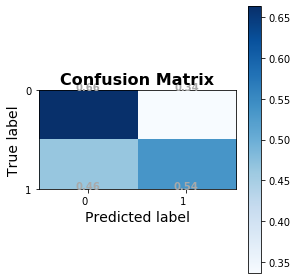







---------------------------------------------------------------------------
---------------------------------------------------------------------------
[i] Current Params = {
		second_layer : False,
		n_units2 : 32,
		n_units : 64,
		activation_fn : tanh,
		optimizer : adam,
		}
Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 64)                196672    
_________________________________________________________________
dense_49 (Dense)             (None, 2)                 130       
Total params: 196,802
Trainable params: 196,802
Non-trainable params: 0
_________________________________________________________________


None

Train on 4800 samples, validate on 800 samples
Epoch 1/50
4800/4800 [==============================] - 0s 52us/step - loss: 0.7766 - accuracy: 0.4983 - val_loss: 0.6910 - val_accuracy: 0.5300
Epoch 2/50
4800/4800 [==============================] - 0s 32us/step - loss: 0.6959 - accuracy: 0.4935 - val_loss: 0.6934 - val_accuracy: 0.4712
Epoch 3/50
4800/4800 [==============================] - 0s 32us/step - loss: 0.6935 - accuracy: 0.5073 - val_loss: 0.6935 - val_accuracy: 0.4812
Epoch 4/50
4800/4800 [==============================] - 0s 30us/step - loss: 0.6896 - accuracy: 0.5381 - val_loss: 0.6953 - val_accuracy: 0.4900
Epoch 5/50
4800/4800 [==============================] - 0s 31us/step - loss: 0.6917 - accuracy: 0.5227 - val_loss: 0.6890 - val_accuracy: 0.5275
Epoch 6/50
4800/4800 [==============================] - 0s 31us/step - loss: 0.6822 - accuracy: 0.5635 - val_loss: 0.6915 - val_accuracy: 0.5375
Epoch 7/50
4800/4800 [==============================] - 0s 32us/step - loss: 0.6881

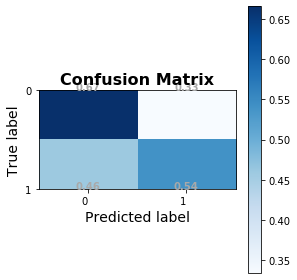







---------------------------------------------------------------------------
---------------------------------------------------------------------------
[i] Current Params = {
		second_layer : False,
		n_units2 : 32,
		n_units : 64,
		activation_fn : tanh,
		optimizer : adam,
		}
Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 64)                196672    
_________________________________________________________________
dense_51 (Dense)             (None, 2)                 130       
Total params: 196,802
Trainable params: 196,802
Non-trainable params: 0
_________________________________________________________________


None

Train on 4800 samples, validate on 800 samples
Epoch 1/50
4800/4800 [==============================] - 0s 50us/step - loss: 0.8006 - accuracy: 0.5271 - val_loss: 0.6894 - val_accuracy: 0.5487
Epoch 2/50
4800/4800 [==============================] - 0s 32us/step - loss: 0.6853 - accuracy: 0.5558 - val_loss: 0.6885 - val_accuracy: 0.5288
Epoch 3/50
4800/4800 [==============================] - 0s 32us/step - loss: 0.6782 - accuracy: 0.5713 - val_loss: 0.6837 - val_accuracy: 0.5537
Epoch 4/50
4800/4800 [==============================] - 0s 30us/step - loss: 0.6726 - accuracy: 0.5898 - val_loss: 0.6867 - val_accuracy: 0.5400
Epoch 5/50
4800/4800 [==============================] - 0s 31us/step - loss: 0.6673 - accuracy: 0.5960 - val_loss: 0.6806 - val_accuracy: 0.5725
Epoch 6/50
4800/4800 [==============================] - 0s 30us/step - loss: 0.6633 - accuracy: 0.6052 - val_loss: 0.6779 - val_accuracy: 0.5775
Epoch 7/50
4800/4800 [==============================] - 0s 29us/step - loss: 0.6638

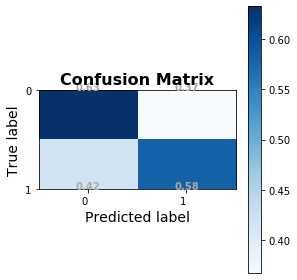







---------------------------------------------------------------------------
---------------------------------------------------------------------------
[i] Current Params = {
		second_layer : True,
		n_units2 : 32,
		n_units : 64,
		activation_fn : tanh,
		optimizer : rmsprop,
		}
Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             (None, 64)                196672    
_________________________________________________________________
dense_53 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_54 (Dense)             (None, 2)                 66        
Total params: 198,818
Trainable params: 198,818
Non-trainable params: 0
_________________________________________________________________


None

Train on 4800 samples, validate on 800 samples
Epoch 1/50
4800/4800 [==============================] - 0s 51us/step - loss: 0.7240 - accuracy: 0.5104 - val_loss: 0.6904 - val_accuracy: 0.5250
Epoch 2/50
4800/4800 [==============================] - 0s 31us/step - loss: 0.6958 - accuracy: 0.5177 - val_loss: 0.7057 - val_accuracy: 0.5288
Epoch 3/50
4800/4800 [==============================] - 0s 28us/step - loss: 0.6923 - accuracy: 0.5302 - val_loss: 0.6870 - val_accuracy: 0.5337
Epoch 4/50
4800/4800 [==============================] - 0s 28us/step - loss: 0.6847 - accuracy: 0.5448 - val_loss: 0.6904 - val_accuracy: 0.5500
Epoch 5/50
4800/4800 [==============================] - 0s 28us/step - loss: 0.6723 - accuracy: 0.5742 - val_loss: 0.6765 - val_accuracy: 0.5775
Epoch 6/50
4800/4800 [==============================] - 0s 28us/step - loss: 0.6646 - accuracy: 0.5969 - val_loss: 0.7206 - val_accuracy: 0.5325
Epoch 7/50
4800/4800 [==============================] - 0s 28us/step - loss: 0.6624

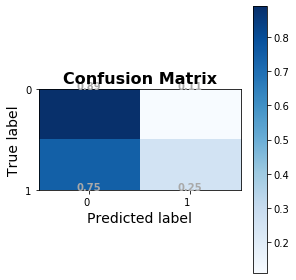







---------------------------------------------------------------------------
---------------------------------------------------------------------------
[i] Current Params = {
		second_layer : True,
		n_units2 : 32,
		n_units : 64,
		activation_fn : tanh,
		optimizer : rmsprop,
		}
Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 64)                196672    
_________________________________________________________________
dense_56 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_57 (Dense)             (None, 2)                 66        
Total params: 198,818
Trainable params: 198,818
Non-trainable params: 0
_________________________________________________________________


None

Train on 4800 samples, validate on 800 samples
Epoch 1/50
4800/4800 [==============================] - 0s 52us/step - loss: 0.8674 - accuracy: 0.4983 - val_loss: 0.7408 - val_accuracy: 0.5288
Epoch 2/50
4800/4800 [==============================] - 0s 29us/step - loss: 0.6953 - accuracy: 0.5425 - val_loss: 0.7024 - val_accuracy: 0.5050
Epoch 3/50
4800/4800 [==============================] - 0s 28us/step - loss: 0.6844 - accuracy: 0.5600 - val_loss: 0.7247 - val_accuracy: 0.5138
Epoch 4/50
4800/4800 [==============================] - 0s 28us/step - loss: 0.6814 - accuracy: 0.5677 - val_loss: 0.6812 - val_accuracy: 0.5738
Epoch 5/50
4800/4800 [==============================] - 0s 29us/step - loss: 0.6763 - accuracy: 0.5729 - val_loss: 0.7137 - val_accuracy: 0.4950
Epoch 6/50
4800/4800 [==============================] - 0s 28us/step - loss: 0.6700 - accuracy: 0.5913 - val_loss: 0.6819 - val_accuracy: 0.5612
Epoch 7/50
4800/4800 [==============================] - 0s 28us/step - loss: 0.6705

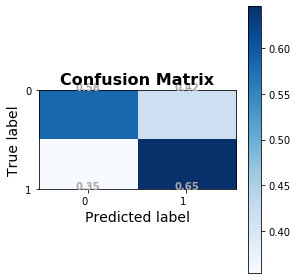







---------------------------------------------------------------------------
---------------------------------------------------------------------------
[i] Current Params = {
		second_layer : True,
		n_units2 : 32,
		n_units : 64,
		activation_fn : tanh,
		optimizer : rmsprop,
		}
Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_58 (Dense)             (None, 64)                196672    
_________________________________________________________________
dense_59 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_60 (Dense)             (None, 2)                 66        
Total params: 198,818
Trainable params: 198,818
Non-trainable params: 0
_________________________________________________________________


None

Train on 4800 samples, validate on 800 samples
Epoch 1/50
4800/4800 [==============================] - 0s 62us/step - loss: 0.7080 - accuracy: 0.5175 - val_loss: 0.7019 - val_accuracy: 0.5288
Epoch 2/50
4800/4800 [==============================] - 0s 32us/step - loss: 0.6905 - accuracy: 0.5406 - val_loss: 0.6987 - val_accuracy: 0.5013
Epoch 3/50
4800/4800 [==============================] - 0s 27us/step - loss: 0.6859 - accuracy: 0.5706 - val_loss: 0.6792 - val_accuracy: 0.5850
Epoch 4/50
4800/4800 [==============================] - 0s 29us/step - loss: 0.6851 - accuracy: 0.5665 - val_loss: 0.6816 - val_accuracy: 0.5612
Epoch 5/50
4800/4800 [==============================] - 0s 31us/step - loss: 0.6795 - accuracy: 0.5810 - val_loss: 0.6793 - val_accuracy: 0.5663
Epoch 6/50
4800/4800 [==============================] - 0s 33us/step - loss: 0.6710 - accuracy: 0.5975 - val_loss: 0.7173 - val_accuracy: 0.5312
Epoch 7/50
4800/4800 [==============================] - 0s 33us/step - loss: 0.6716

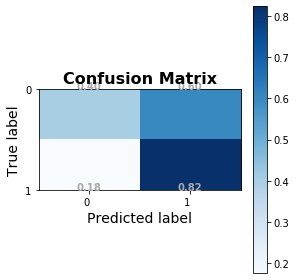







---------------------------------------------------------------------------
---------------------------------------------------------------------------
[i] Current Params = {
		second_layer : False,
		n_units2 : 32,
		n_units : 64,
		activation_fn : tanh,
		optimizer : rmsprop,
		}
Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_61 (Dense)             (None, 64)                196672    
_________________________________________________________________
dense_62 (Dense)             (None, 2)                 130       
Total params: 196,802
Trainable params: 196,802
Non-trainable params: 0
_________________________________________________________________


None

Train on 4800 samples, validate on 800 samples
Epoch 1/50
4800/4800 [==============================] - 0s 49us/step - loss: 1.1474 - accuracy: 0.4965 - val_loss: 0.6928 - val_accuracy: 0.4938
Epoch 2/50
4800/4800 [==============================] - 0s 32us/step - loss: 0.6983 - accuracy: 0.5271 - val_loss: 0.6806 - val_accuracy: 0.5663
Epoch 3/50
4800/4800 [==============================] - 0s 32us/step - loss: 0.6847 - accuracy: 0.5590 - val_loss: 0.6864 - val_accuracy: 0.5587
Epoch 4/50
4800/4800 [==============================] - 0s 32us/step - loss: 0.6774 - accuracy: 0.5831 - val_loss: 0.6799 - val_accuracy: 0.5750
Epoch 5/50
4800/4800 [==============================] - 0s 35us/step - loss: 0.6757 - accuracy: 0.5877 - val_loss: 0.6982 - val_accuracy: 0.5412
Epoch 6/50
4800/4800 [==============================] - 0s 34us/step - loss: 0.6618 - accuracy: 0.5956 - val_loss: 0.6937 - val_accuracy: 0.5525
Epoch 7/50
4800/4800 [==============================] - 0s 34us/step - loss: 0.6627

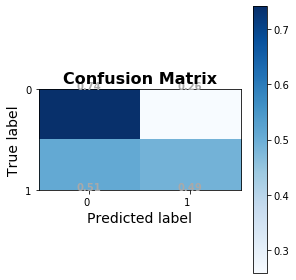







---------------------------------------------------------------------------
---------------------------------------------------------------------------
[i] Current Params = {
		second_layer : False,
		n_units2 : 32,
		n_units : 64,
		activation_fn : tanh,
		optimizer : rmsprop,
		}
Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_63 (Dense)             (None, 64)                196672    
_________________________________________________________________
dense_64 (Dense)             (None, 2)                 130       
Total params: 196,802
Trainable params: 196,802
Non-trainable params: 0
_________________________________________________________________


None

Train on 4800 samples, validate on 800 samples
Epoch 1/50
4800/4800 [==============================] - 0s 51us/step - loss: 1.1609 - accuracy: 0.4975 - val_loss: 0.7009 - val_accuracy: 0.4850
Epoch 2/50
4800/4800 [==============================] - 0s 27us/step - loss: 0.6968 - accuracy: 0.5308 - val_loss: 0.6989 - val_accuracy: 0.5113
Epoch 3/50
4800/4800 [==============================] - 0s 27us/step - loss: 0.6884 - accuracy: 0.5619 - val_loss: 0.6882 - val_accuracy: 0.5375
Epoch 4/50
4800/4800 [==============================] - 0s 24us/step - loss: 0.6860 - accuracy: 0.5648 - val_loss: 0.6938 - val_accuracy: 0.5300
Epoch 5/50
4800/4800 [==============================] - 0s 24us/step - loss: 0.6760 - accuracy: 0.5869 - val_loss: 0.7284 - val_accuracy: 0.5312
Epoch 6/50
4800/4800 [==============================] - 0s 25us/step - loss: 0.6683 - accuracy: 0.5958 - val_loss: 0.7186 - val_accuracy: 0.5175
Epoch 7/50
4800/4800 [==============================] - 0s 24us/step - loss: 0.6582

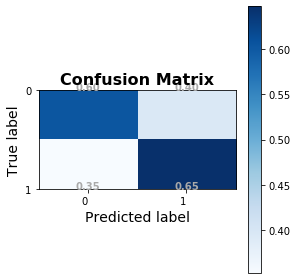







---------------------------------------------------------------------------
---------------------------------------------------------------------------
[i] Current Params = {
		second_layer : False,
		n_units2 : 32,
		n_units : 64,
		activation_fn : tanh,
		optimizer : rmsprop,
		}
Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_65 (Dense)             (None, 64)                196672    
_________________________________________________________________
dense_66 (Dense)             (None, 2)                 130       
Total params: 196,802
Trainable params: 196,802
Non-trainable params: 0
_________________________________________________________________


None

Train on 4800 samples, validate on 800 samples
Epoch 1/50
4800/4800 [==============================] - 0s 48us/step - loss: 0.7474 - accuracy: 0.5154 - val_loss: 0.7174 - val_accuracy: 0.5288
Epoch 2/50
4800/4800 [==============================] - 0s 29us/step - loss: 0.7051 - accuracy: 0.5446 - val_loss: 0.6830 - val_accuracy: 0.5525
Epoch 3/50
4800/4800 [==============================] - 0s 30us/step - loss: 0.6822 - accuracy: 0.5690 - val_loss: 0.6914 - val_accuracy: 0.5550
Epoch 4/50
4800/4800 [==============================] - 0s 28us/step - loss: 0.6790 - accuracy: 0.5794 - val_loss: 0.6980 - val_accuracy: 0.5450
Epoch 5/50
4800/4800 [==============================] - 0s 31us/step - loss: 0.6803 - accuracy: 0.5910 - val_loss: 0.7201 - val_accuracy: 0.5263
Epoch 6/50
4800/4800 [==============================] - 0s 33us/step - loss: 0.6717 - accuracy: 0.5998 - val_loss: 0.6747 - val_accuracy: 0.5813
Epoch 7/50
4800/4800 [==============================] - 0s 28us/step - loss: 0.6639

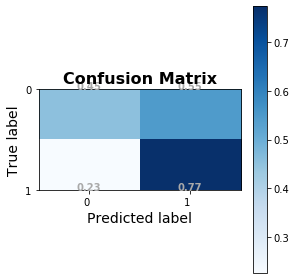







---------------------------------------------------------------------------
---------------------------------------------------------------------------
[i] Current Params = {
		second_layer : False,
		n_units2 : 32,
		n_units : 64,
		activation_fn : tanh,
		optimizer : rmsprop,
		}
Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_67 (Dense)             (None, 64)                196672    
_________________________________________________________________
dense_68 (Dense)             (None, 2)                 130       
Total params: 196,802
Trainable params: 196,802
Non-trainable params: 0
_________________________________________________________________


None

Train on 7200 samples, validate on 800 samples
Epoch 1/50
7200/7200 [==============================] - 0s 50us/step - loss: 0.7734 - accuracy: 0.5149 - val_loss: 0.6826 - val_accuracy: 0.5462
Epoch 2/50
7200/7200 [==============================] - 0s 29us/step - loss: 0.6889 - accuracy: 0.5594 - val_loss: 0.6971 - val_accuracy: 0.5188
Epoch 3/50
7200/7200 [==============================] - 0s 27us/step - loss: 0.6871 - accuracy: 0.5807 - val_loss: 0.7062 - val_accuracy: 0.5288
Epoch 4/50
7200/7200 [==============================] - 0s 28us/step - loss: 0.6754 - accuracy: 0.5874 - val_loss: 0.6728 - val_accuracy: 0.5800
Epoch 5/50
7200/7200 [==============================] - 0s 30us/step - loss: 0.6654 - accuracy: 0.6015 - val_loss: 0.6920 - val_accuracy: 0.5512
Epoch 6/50
7200/7200 [==============================] - 0s 29us/step - loss: 0.6638 - accuracy: 0.6014 - val_loss: 0.8109 - val_accuracy: 0.5125
Epoch 7/50
7200/7200 [==============================] - 0s 28us/step - loss: 0.6606

GridSearchCV(cv=3, error_score=nan,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x16c3de278>,
             iid='deprecated', n_jobs=None,
             param_grid={'activation_fn': ['relu', 'tanh'],
                         'optimizer': ['adam', 'rmsprop'],
                         'second_layer': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(my_custom_scorer), verbose=0)

In [40]:
search = GridSearchCV(model,param_grid,cv=3,
                      scoring=make_scorer(my_custom_scorer))

search.fit(X_train_img,y_train,epochs=50,batch_size=64,validation_data=(X_val_img,y_val))


In [41]:
search.best_params_

{'activation_fn': 'tanh', 'optimizer': 'rmsprop', 'second_layer': False}

# ADDITIONAL FUNCTIONS (did not get to in class)

In [42]:
def evaluate_gridsearch(search,X_test_img, y_test,verbose=True):
    """Extracts best model and predictions from Gridsearch results and displays
    evaluation function results"""
    best_model = search.best_estimator_.model
    if verbose: best_model.summary()
    history = best_model.history.history
    plot_keras_history(history)
    y_hat_test = best_model.predict(X_test_img)
    evaluate_model(y_test,y_hat_test)

    return best_model, y_hat_test

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_67 (Dense)             (None, 64)                196672    
_________________________________________________________________
dense_68 (Dense)             (None, 2)                 130       
Total params: 196,802
Trainable params: 196,802
Non-trainable params: 0
_________________________________________________________________


------------------------------------------------------------
	CLASSIFICATION REPORT:
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.50      0.19      0.27      1000
           1       0.50      0.81      0.62      1000

    accuracy                           0.50      2000
   macro avg       0.50      0.50      0.45      2000
weighted avg       0.50      0.50      0.45      2000



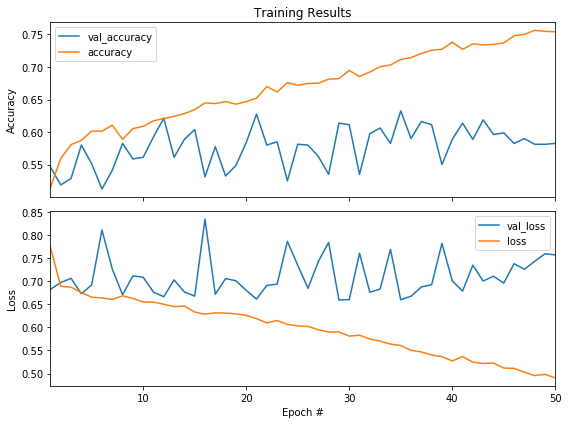

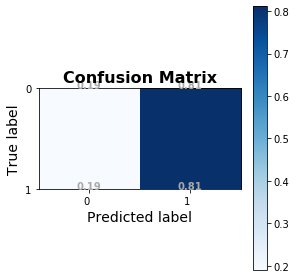

In [43]:
best_model,y_pred = evaluate_gridsearch(search,X_test_img,y_test)

In [44]:
def get_cv_results_df(search,keep_splits=False):
    """Extracts .cv_results_ from gridsearch and returns as a dataframe sorted
    by model score"""
    ## Get cv_results
    cv_results = pd.DataFrame(search.cv_results_)
    cv_results.set_index('rank_test_score',inplace=True)
    cv_results.sort_index(inplace=True)
    # cv_results.style.background_gradient(subset='mean_test_score')


    keep_cols = ['mean_test_score','std_test_score',
                 'mean_fit_time','std_fit_time']
    keep_cols.extend([col for col in cv_results.columns if 'param_' in col])
    
    if keep_splits:
        keep_cols.extend([col for col in cv_results.columns if 'split' in col])

    cv_results= cv_results[keep_cols]
    return cv_results

In [45]:
get_cv_results_df(search)

,mean_test_score,std_test_score,mean_fit_time,std_fit_time,param_activation_fn,param_optimizer,param_second_layer
rank_test_score,,,,,,,
1,0.615556,0.006975,7.385545,0.302348,tanh,rmsprop,False
2,0.610833,0.010023,10.054659,0.645974,relu,adam,False
3,0.608194,0.008636,7.273663,0.146128,relu,rmsprop,False
4,0.602639,0.004619,8.016553,0.051561,tanh,adam,False
5,0.600000,0.014256,10.655819,0.821533,relu,adam,True
6,0.595278,0.004427,8.621535,0.441434,tanh,adam,True
7,0.593472,0.024472,7.659028,0.257310,tanh,rmsprop,True
8,0.592917,0.008312,8.300204,0.363457,relu,rmsprop,True
